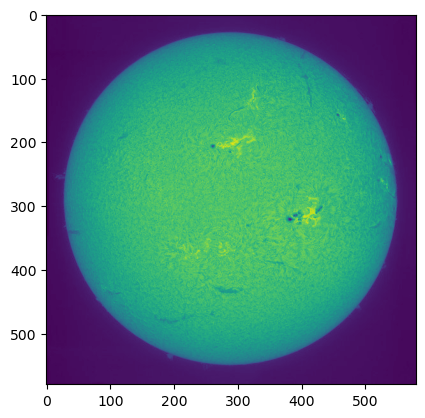

In [74]:
import cv2
import matplotlib.pyplot as plt

#Load grayscale image
image = cv2.imread("giantsunspot.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image)

1.cv2.imread(): reads the image file

2.cv2.IMREAD_GRAYSCALE: to load the image in Grayscale mode

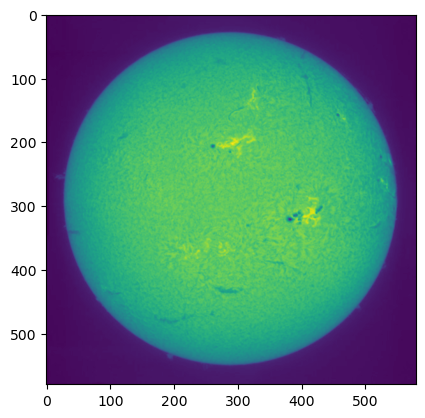

In [75]:
# Apply Gaussian blur for noise reduction 
blur = cv2.GaussianBlur(image, (3, 3), 0)
plt.imshow(blur)

1.cv2.GaussianBlur(source, ksize, sigmaX): used for noise reduction

     -(5,5): width and height of kernel determines the smoothing to the image
     
     -0 : indicates automatically calculate the standard deviation based on kernel size.

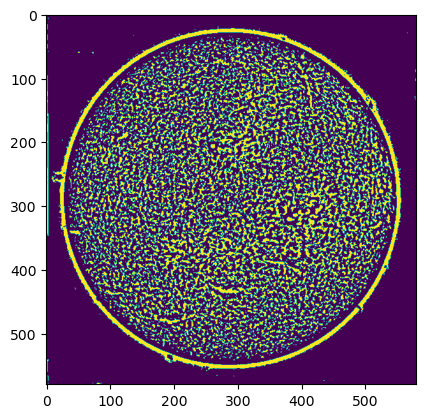

In [76]:
# Adaptive thresholding to separate sunspots
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY_INV, 11, 2)
plt.imshow(thresh)

1.cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C): calculates the threshold value for each      pixel on mean of the neighborhood area arond that pixel.

     -maxValue: max intensity value to represent the object in the binary image.
     
     -cv2.ADAPTIVE_THRESH_MEAN_C: indicates that the threshold value is the mean of the neighborhood area around each pixel.
     
    -cv2.THRESH_BINARY_INV: means that pixel values greater than the threshold will be set to 0, and all other pixel values will                             be set to the maximum value.
    
     -blockSize: the size of the neighborhood area (block size) around each pixel.
     
     -C:  a constant subtracted from the mean of the neighborhood area.

In [77]:
# Find contours (potential sunspots)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Analyze and filter contours
sunspots = []
for cnt in contours:
  # Filter small contours (noise)
  if cv2.contourArea(cnt) > 100:
    # Get bounding rectangle or other properties (area, circularity)
    x, y, w, h = cv2.boundingRect(cnt)
    sunspots.append((x, y, w, h))

# Draw bounding boxes around detected sunspots
for spot in sunspots:
  x, y, w, h = spot
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 100, 255),1 )

cv2.findContours(image, mode, method): to find the contours in binary image after obtaining threshold.

    -cv2.RETR_EXTERNAL:  retrieves only the external contours, ignoring any contours nested within others. Used only in the                              outer boundaries of objects.
    
    -cv2.CHAIN_APPROX_SIMPLE: compresses horizontal, vertical, and diagonal segments and leaves only their end points.

cv2.contourArea(cnt):  the function calculates the area enclosed by the contours.

cv2.boundingRect(cnt): the function computes the smallest upright bounding rectangle that encloses the contour.

cv2.rectangle(img, pt1, pt2, color, thickness): This line draws a rectangle on the image around each detected sunspot using the bounding box coordinates (x, y, w, h). The rectangle is drawn with a red color (0, 0, 255) and a thickness of 1 pixel.

In [78]:
cv2.imshow("Detected sunspots", image)
cv2.imshow("Threshold image", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
Sun_sunspot (1).jpg
giantsunspot.jpg